In [1]:
from google.colab import files
import zipfile
import os
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine learning Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [4]:
zip_path = "/content/drive/MyDrive/CSV-03-11.zip"

In [5]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("data")

In [6]:
print("Fichiers extraits :", os.listdir("data"))

Fichiers extraits : ['03-11']


In [7]:
csv_files = [f for f in os.listdir("data/03-11") if f.endswith(".csv")]
dataframes = {f: pd.read_csv(os.path.join("data/03-11", f)) for f in csv_files}

/tmp/ipython-input-3366285951.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = {f: pd.read_csv(os.path.join("data/03-11", f)) for f in csv_files}
/tmp/ipython-input-3366285951.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = {f: pd.read_csv(os.path.join("data/03-11", f)) for f in csv_files}
/tmp/ipython-input-3366285951.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = {f: pd.read_csv(os.path.join("data/03-11", f)) for f in csv_files}
/tmp/ipython-input-3366285951.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = {f: pd.read_csv(os.path.join("data/03-11", f)) for f in csv_files}
/tmp/ipython-input-3366285951.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_m

In [8]:
len(csv_files)


7

# PORTMap


In [9]:
file = csv_files[3]
print("Aperçu du fichier :", file)
dataframes[file].head()

Aperçu du fichier : Portmap.csv


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,24,192.168.50.254-224.0.0.5-0-0-0,192.168.50.254,0,224.0.0.5,0,0,2018-11-03 09:18:16.964447,114456999,45,...,28337.112288,98168.0,3.0,9529897.25,351582.631269,10001143.0,9048097.0,0,0,BENIGN
1,26,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-11-03 09:18:18.506537,114347504,56,...,121314.911865,420255.0,4.0,9493929.75,351541.079539,9978130.0,8820294.0,0,0,BENIGN
2,176563,172.217.10.98-192.168.50.6-443-54799-6,192.168.50.6,54799,172.217.10.98,443,6,2018-11-03 09:18:18.610576,36435473,6,...,0.000000,62416.0,62416.0,36373056.00,0.000000,36373056.0,36373056.0,0,0,BENIGN
3,50762,172.217.7.2-192.168.50.6-443-54800-6,192.168.50.6,54800,172.217.7.2,443,6,2018-11-03 09:18:18.610579,36434705,6,...,0.000000,62413.0,62413.0,36372291.00,0.000000,36372291.0,36372291.0,0,0,BENIGN
4,87149,172.217.10.98-192.168.50.6-443-54801-6,192.168.50.6,54801,172.217.10.98,443,6,2018-11-03 09:18:18.610581,36434626,6,...,0.000000,62409.0,62409.0,36372216.00,0.000000,36372216.0,36372216.0,0,0,BENIGN


In [10]:
dataframes[file].columns = dataframes[file].columns.str.strip()

In [11]:
dataframes[file].loc[:,'Label'].unique()

array(['BENIGN', 'Portmap'], dtype=object)

In [12]:
df=dataframes[file]

In [13]:
df.shape

(191694, 88)

In [14]:
df.describe()

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,191694.000000,191694.000000,191694.000000,191694.000000,1.916940e+05,191694.000000,191694.000000,191694.000000,1.916940e+05,191694.000000,...,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,191694.000000
mean,95846.500000,2088.157068,32152.417843,16.799915,3.429798e+05,2.269868,0.381493,470.704451,4.068446e+02,228.300849,...,-9.895723e+06,3.125842e+03,1.714300e+03,5.498896e+03,2.033322e+03,1.178584e+05,7.717813e+03,1.256591e+05,1.110960e+05,0.977146
std,55337.435588,8566.647296,19319.329351,1.485127,5.957307e+06,46.812214,72.545552,684.066594,1.335419e+05,74.193653,...,1.020711e+08,1.124319e+05,8.231591e+04,2.069510e+05,9.520603e+04,2.384008e+06,3.836531e+05,2.502066e+06,2.326992e+06,0.149439
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,...,-1.062719e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,47923.250000,648.000000,15376.500000,17.000000,1.000000e+00,2.000000,0.000000,458.000000,0.000000e+00,229.000000,...,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
50%,95846.500000,651.000000,32215.000000,17.000000,1.000000e+00,2.000000,0.000000,458.000000,0.000000e+00,229.000000,...,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,143769.750000,846.000000,48947.000000,17.000000,1.000000e+00,2.000000,0.000000,458.000000,0.000000e+00,229.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
max,191693.000000,65528.000000,65535.000000,17.000000,1.199474e+08,20444.000000,31700.000000,150726.000000,5.842950e+07,3583.000000,...,4.400000e+01,1.400653e+07,2.135244e+07,4.553668e+07,1.113396e+07,8.279180e+07,3.475561e+07,8.279180e+07,8.279180e+07,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191694 entries, 0 to 191693
Data columns (total 88 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   191694 non-null  int64  
 1   Flow ID                      191694 non-null  object 
 2   Source IP                    191694 non-null  object 
 3   Source Port                  191694 non-null  int64  
 4   Destination IP               191694 non-null  object 
 5   Destination Port             191694 non-null  int64  
 6   Protocol                     191694 non-null  int64  
 7   Timestamp                    191694 non-null  object 
 8   Flow Duration                191694 non-null  int64  
 9   Total Fwd Packets            191694 non-null  int64  
 10  Total Backward Packets       191694 non-null  int64  
 11  Total Length of Fwd Packets  191694 non-null  float64
 12  Total Length of Bwd Packets  191694 non-null  float64
 13 

In [20]:
# Create a histogram plot for each feature
#plt.figure(5)
#for col in df.columns:
#    plt.hist(data_f[col])
 #   plt.title(col)
 #   plt.show()

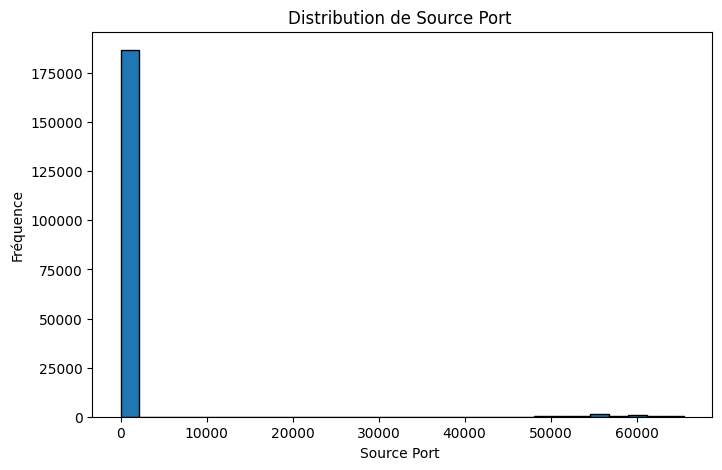

In [16]:

plt.figure(figsize=(8,5))  # taille de la figure
plt.hist(df['Source Port'], bins=30, edgecolor='black')  # histogramme
plt.title('Distribution de Source Port ')  # titre
plt.xlabel('Source Port ')  # label axe X
plt.ylabel('Fréquence')  # label axe Y
plt.show()

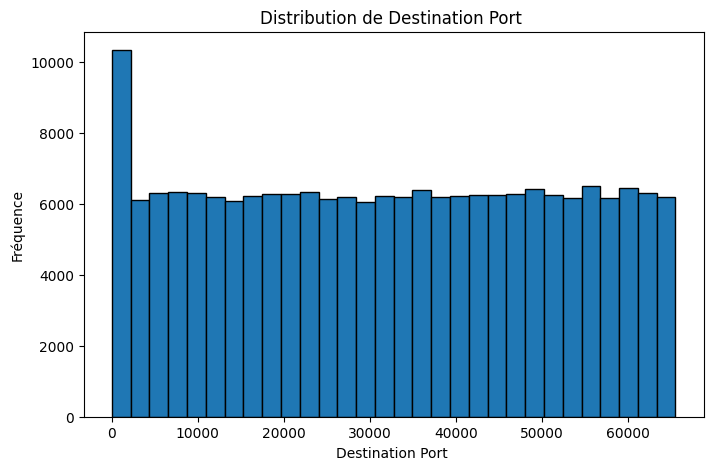

In [17]:
plt.figure(figsize=(8,5))  # taille de la figure
plt.hist(df['Destination Port'], bins=30, edgecolor='black')  # histogramme
plt.title('Distribution de Destination Port ')  # titre
plt.xlabel('Destination Port ')  # label axe X
plt.ylabel('Fréquence')  # label axe Y
plt.show()

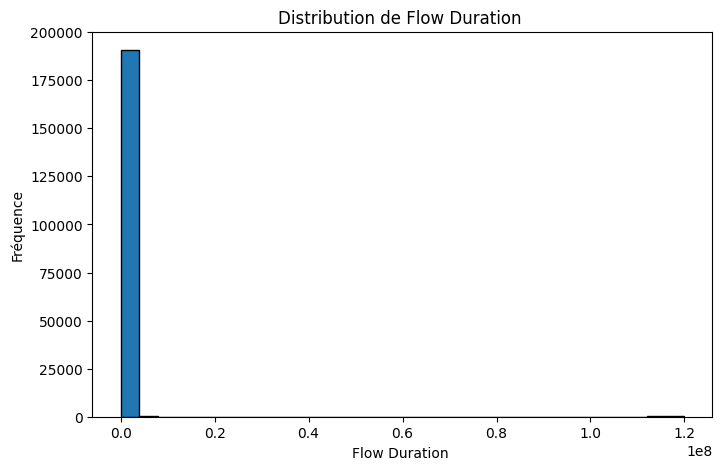

In [18]:

plt.figure(figsize=(8,5))  # taille de la figure
plt.hist(df['Flow Duration'], bins=30, edgecolor='black')  # histogramme
plt.title('Distribution de Flow Duration ')  # titre
plt.xlabel('Flow Duration ')  # label axe X
plt.ylabel('Fréquence')  # label axe Y
plt.show()

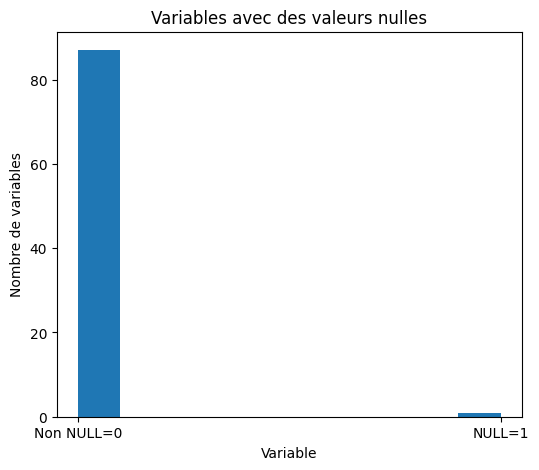

In [20]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 6,5))
plt.hist( df.isna().sum())
# Set the title and axis labels
plt.xticks([0, 1], labels=['Non NULL=0', 'NULL=1'])
plt.title('Variables avec des valeurs nulles')
plt.xlabel('Variable')
plt.ylabel('Nombre de variables')

# Show the plot
plt.show()

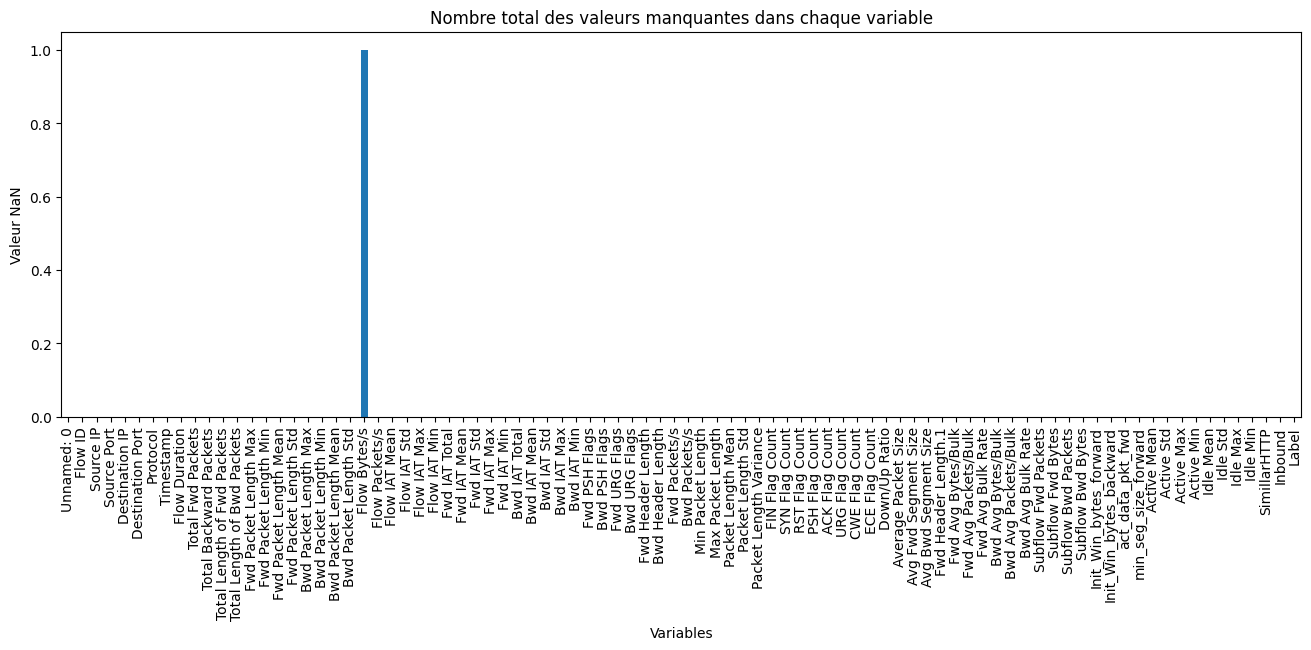

In [23]:
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Counting null values for each column
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Variables")
    plt.ylabel("Valeur NaN")
    plt.title("Nombre total des valeurs manquantes dans chaque variable")
    plt.show()

plotMissingValues(df)

In [24]:
df=df.dropna()

In [25]:
df.loc[:,'Label'].unique()

array(['BENIGN', 'Portmap'], dtype=object)

In [26]:
df.loc[:,'Label'].value_counts()

,count
Label,
Portmap,186960
BENIGN,4733


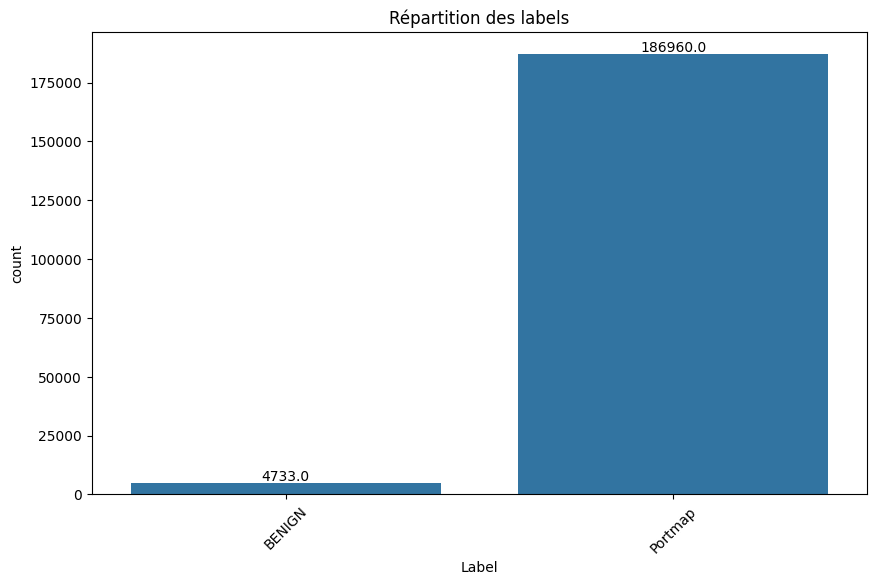

In [28]:
plt.figure(figsize=(10,6))  # taille plus grande pour lisibilité
ax = sns.countplot(x='Label', data=df)

# Ajouter les nombres au-dessus de chaque barre
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45)   # rotation si les labels sont longs
plt.title("Répartition des labels")
plt.show()

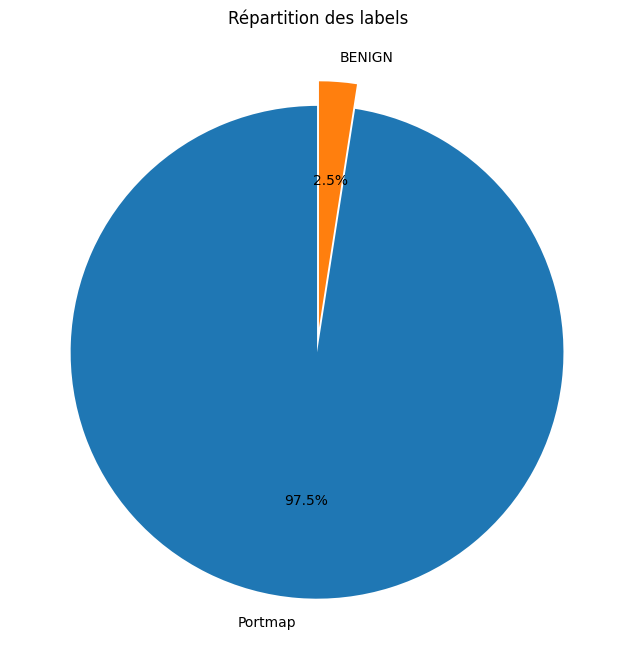

In [29]:
# Compter les occurrences des labels
label_counts = df['Label'].value_counts()

# Créer un pie chart
plt.figure(figsize=(8,8))
plt.pie(label_counts,
        labels=label_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        explode=[0.05]*len(label_counts))  # mettre un petit effet d’écart

plt.title("Répartition des labels")
plt.show()

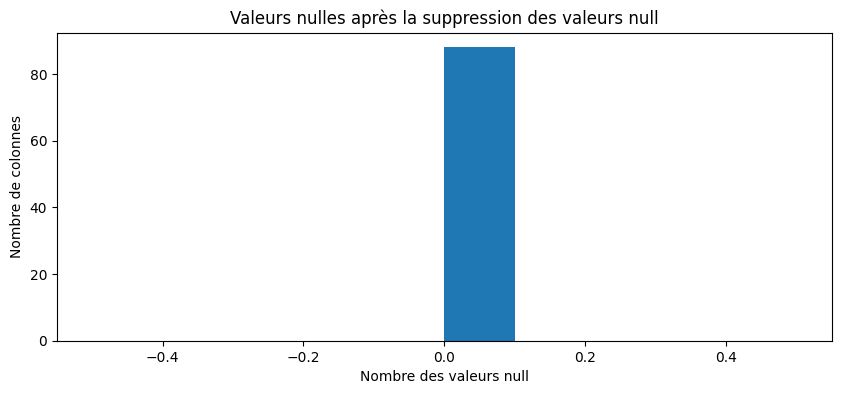

In [30]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( df.isna().sum())
# Set the title and axis labels
plt.title('Valeurs nulles après la suppression des valeurs null')
plt.xlabel('Nombre des valeurs null')
plt.ylabel('Nombre de colonnes')

# Show the plot
plt.show()

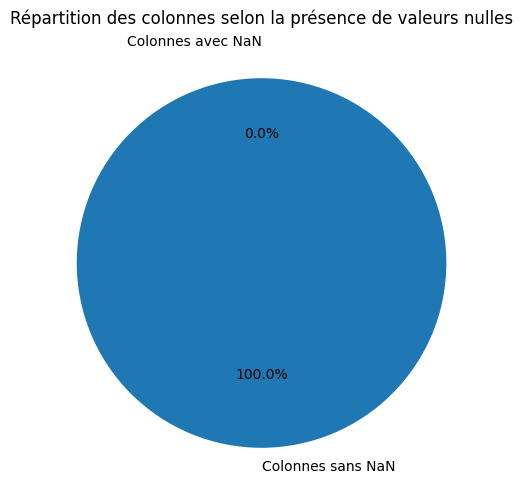

In [33]:
# Nombre de colonnes avec et sans valeurs nulles
null_cols = (df.isna().sum() > 0).sum()
non_null_cols = df.shape[1] - null_cols

# Pie chart
plt.figure(figsize=(6,6))
plt.pie([non_null_cols, null_cols],
        labels=['Colonnes sans NaN', 'Colonnes avec NaN'],
        autopct='%1.1f%%',
        startangle=90,
        explode=(0, 0.1))

plt.title("Répartition des colonnes selon la présence de valeurs nulles")
plt.show()

In [34]:
df.isna().sum()

,0
Unnamed: 0,0
Flow ID,0
Source IP,0
Source Port,0
Destination IP,0
...,...
Idle Max,0
Idle Min,0
SimillarHTTP,0
Inbound,0


In [35]:
pd.set_option('use_inf_as_na', True)  # Treat inf as NaN
null_values=df.isnull().sum()  # Check for NaN values

/tmp/ipython-input-2666148233.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na', True)  # Treat inf as NaN


In [36]:
# Lister les colonnes de type object
object_cols = df.select_dtypes(include=['object']).columns

print("Colonnes de type object :")
print(object_cols.tolist())

Colonnes de type object :
['Flow ID', 'Source IP', 'Destination IP', 'Timestamp', 'SimillarHTTP', 'Label']


In [37]:
#drop the columns type object
df = df.drop(['Unnamed: 0','Flow ID', 'Source IP', 'Destination IP','Timestamp','SimillarHTTP'], axis=1)

In [38]:
# Convert the labels in the DataFrame to numerical values
df['Label'] = df['Label'].map({'BENIGN': 0, 'Portmap': 1})


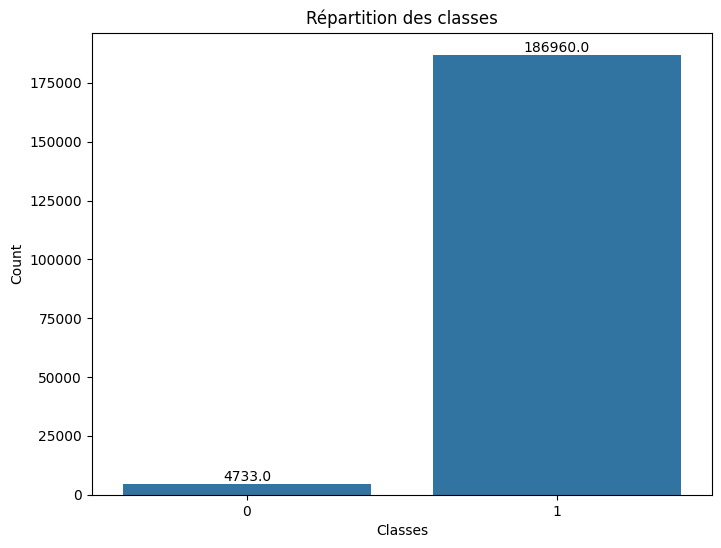

In [39]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Label', data=df)

# Ajouter les valeurs au-dessus des barres
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.title("Répartition des classes")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

# Data splitting and training

In [40]:
# Split data into features and target variable
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [41]:
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (134185, 81)
The test dataset size =  (57508, 81)


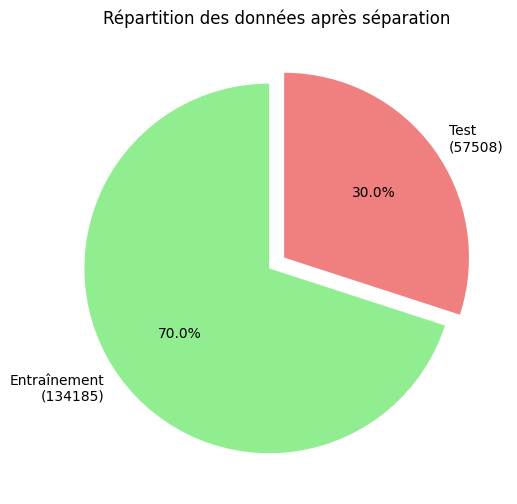

In [50]:
import matplotlib.pyplot as plt

# Taille des ensembles
train_size = len(X_train)
test_size = len(X_test)

# Labels avec nombre absolu
labels = [f"Entraînement\n({train_size})", f"Test\n({test_size})"]

# Pie chart
plt.figure(figsize=(6,6))
plt.pie([train_size, test_size],
        labels=labels,
        autopct=lambda p: f'{p:.1f}%',
        startangle=90,
        colors=['lightgreen', 'lightcoral'],
        explode=(0.05, 0.05))

plt.title("Répartition des données après séparation")
plt.show()


**Random forest**

In [45]:
print("NaN dans X_train :", np.isnan(X_train).sum().sum())
print("Inf dans X_train :", np.isinf(X_train).sum().sum())
print("Valeur max :", np.nanmax(X_train.values))
print("Valeur min :", np.nanmin(X_train.values))

NaN dans X_train : 0
Inf dans X_train : 13732
Valeur max : inf
Valeur min : -2125437944.0


In [46]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test  = X_test.replace([np.inf, -np.inf], np.nan)

In [47]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test  = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

**Random forest**

In [48]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

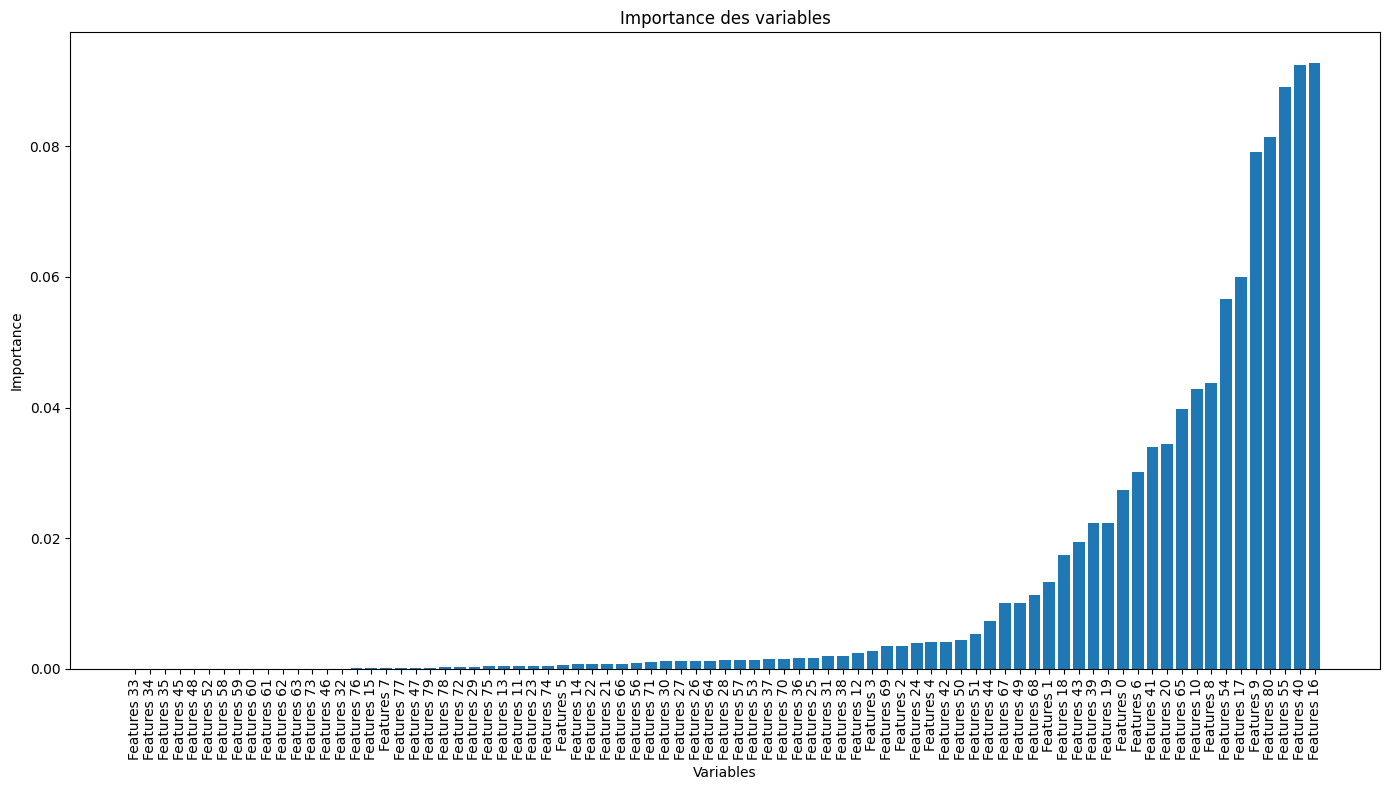

In [53]:
import matplotlib.pyplot as plt

# Taille de la figure plus large pour lisibilité
plt.figure(figsize=(14, 8))

# Bar plot vertical
plt.bar(range(X_train.shape[1]), importances[indices], align="center")

# Noms des features en x
plt.xticks(range(X_train.shape[1]), feature_names, rotation=90)

plt.ylabel("Importance")
plt.xlabel("Variables")
plt.title("Importance des variables")
plt.tight_layout()  # Ajuste la figure pour que les labels ne se chevauchent pas
plt.show()

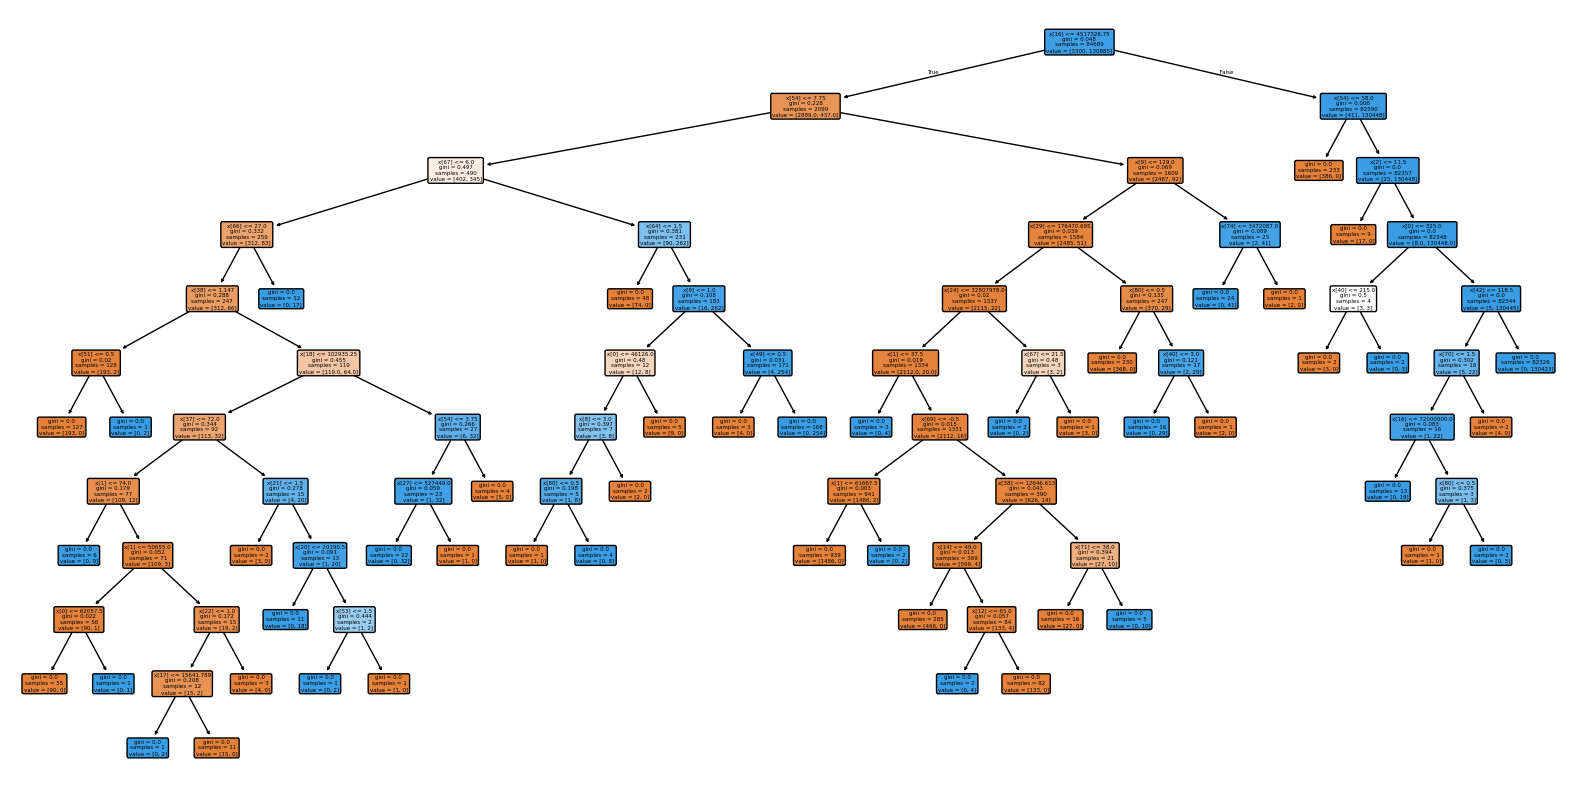

In [54]:
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0]  # Selecting the first estimator from the random forest model


plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

In [55]:
# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [56]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')



Random Forest Metrics:
Accuracy: 0.9999
F1 Score: 1.0000
Precision: 1.0000
Recall: 0.9999


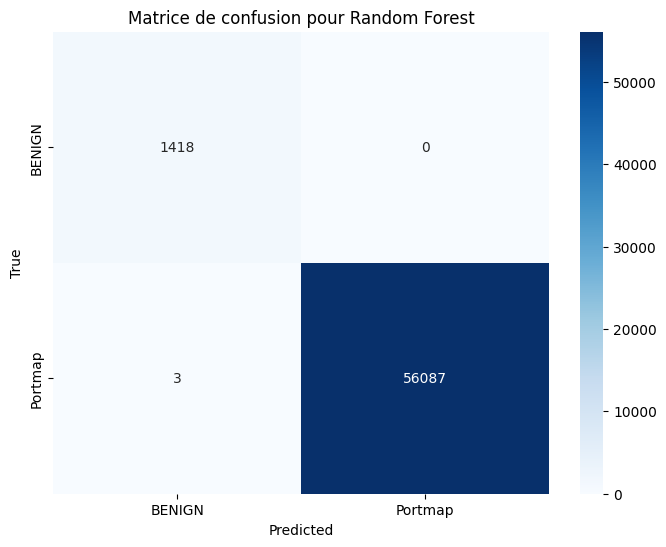

In [58]:
# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['BENIGN', 'Portmap'], 'Matrice de confusion pour Random Forest')

**Régression logistique**

In [59]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [61]:
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')


Logistic Regression Metrics:
Accuracy: 0.9945
F1 Score: 0.9972
Precision: 0.9967
Recall: 0.9977


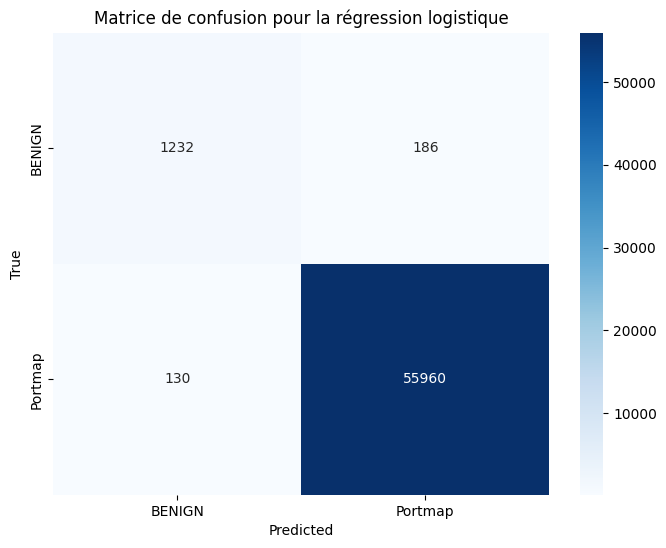

In [62]:
# Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_pred, ['BENIGN', 'Portmap'], 'Matrice de confusion pour la régression logistique')

**Réseaux de neurones**

In [63]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [64]:
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Neural Network Metrics:
Accuracy: 0.9987
F1 Score: 0.9993
Precision: 0.9991
Recall: 0.9995


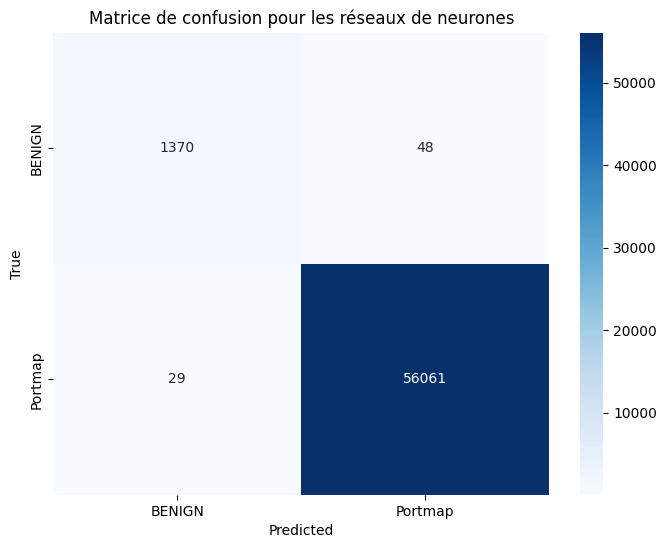

In [70]:
# Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, nn_pred,['BENIGN', 'Portmap'], 'Matrice de confusion pour les réseaux de neurones')

# Comparaison des modéles

In [66]:
# Random Forest
rf_proba = rf_model.predict_proba(X_test)

# Logistic Regression
lr_proba = lr_model.predict_proba(X_test)



# Neural Network
nn_proba = nn_model.predict_proba(X_test)

In [67]:
# Calculate ROC curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

# Calculate ROC curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)



# Calculate ROC curve for Neural Network
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba[:, 1])
nn_auc = auc(nn_fpr, nn_tpr)

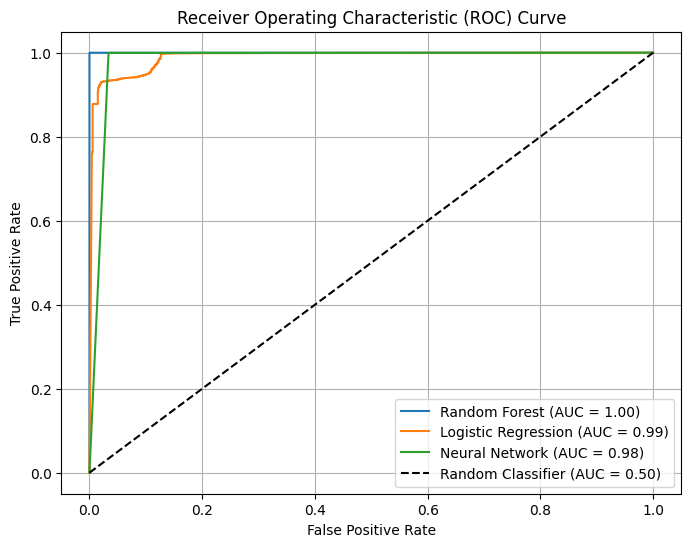

In [68]:
# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')

# Plot ROC curve for random classifier (50% area)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()